In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [14]:
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import torch
import json
import wandb

from src.net import InstanceGCN
from src.dataset import MultiTargetDataset
from src.utils import normalize_curve, compute_integral

In [79]:
results_dir = Path('../data/results/')
opts_dir = Path('../data/interim/')

baseline_results = list()
for baseline_result_fpath in results_dir.glob('ef_500_*.json'):
    size = int(baseline_result_fpath.name.split('_')[3])
    size_id = int(baseline_result_fpath.name.split('_')[4][:-len('.json')])

    with open(baseline_result_fpath) as f:
        baseline_result = json.load(f)

    solution_fpath = opts_dir/f"97_{size}_{size_id}_opt.npz"
    solution_npz = np.load(solution_fpath)
    quasi_optimal_objective = solution_npz['arr_0'].astype('uint32')

    baseline_results.append(dict(
        size=size,
        size_id=size_id,
        opt_obj=quasi_optimal_objective,
        **baseline_result
    ))
df = pd.DataFrame(baseline_results)
df['primal_curve'] = df['primal_curve'].apply(normalize_curve)
df['primal_curve'] = df['primal_curve'] / df['opt_obj']

df.head()

,size,size_id,opt_obj,infeasible,runtime,objective,gap,primal_curve
0,24,64,14123,False,120.000981,13893.0,0.119377,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,20,70,12930,False,120.000055,12765.0,0.005895,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,20,62,7701,False,17.895076,7592.0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,20,64,10449,False,120.000461,10391.0,0.024482,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,13,67,6643,False,33.382714,6461.0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [80]:
df['infeasible'].value_counts()

False    92
True     28
Name: infeasible, dtype: int64

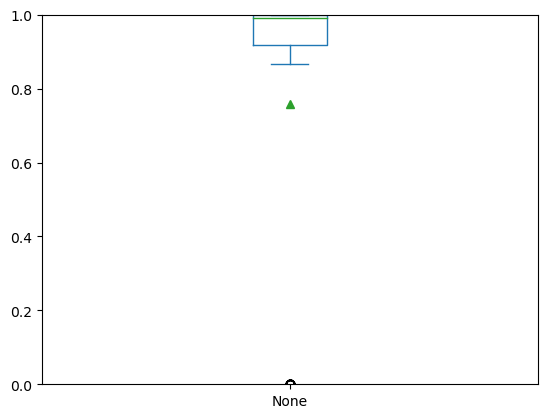

In [81]:
(df['objective'] / df['opt_obj']).plot.box(showmeans=True)
plt.ylim(0,1)
plt.show()

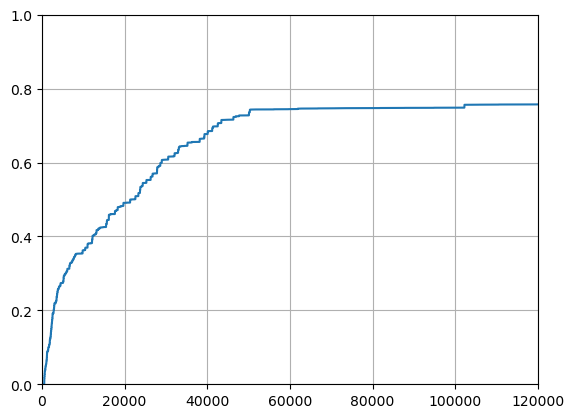

In [84]:
plt.plot(df['primal_curve'].mean())
# plt.plot(df[~df['infeasible']]['primal_curve'].mean())
plt.xlim(0,120/1e-3)
plt.ylim(0,1)
plt.grid()
plt.show()